<a href="https://colab.research.google.com/github/Onamihoang/QuocTrong/blob/master/CIFAR_123_Conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yêu cầu :
1. Test với các nhiều thêm block Conv xem có tăng thêm acc hay giảm loss không?
2. Chỉnh sửa để loss thấp hơn? Tại sao lại thấp hơn?

In [0]:
from __future__ import print_function             #thêm dòng này cho mất đi thông báo??? Cũng không hiểu tại sao luôn :)))
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout
from keras.layers import AveragePooling2D, Input, Flatten

from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

from keras.regularizers import l2
from keras.optimizers import Adam, SGD

ERROR! Session/line number was not unique in database. History logging moved to new session 63


In [0]:
batch_size = 32         # Không hiểu sao batch_size lại làm ảnh hưởng kết quả train... Lẽ ra nó chỉ đc nhanh hay chậm thôi chứ???
epochs = 12             # Với bộ dữ liệu này nên để epoch nhỏ hơn 50... Chờ lâu quá máy bị treo
data_augmentation = True
num_classes = 10

In [0]:
# Thật may mắn khi không phải tiền xử lý dữ liệu... Đó là cả 1 bầu trời rộng lớn.
# Load the CIFAR10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Input image dimensions
input_shape = x_train.shape[1:]

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
# Tạo 1 hàm vẽ đồ thị sau khi train
def summarize_diagnostics(history):
  val_accuracy = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(accuracy))
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
  plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.show()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

- Theo yêu cầu thì chúng ta sẽ buil vài model theo dạng VGG với số Block Conv tăng dần
- Sẽ test thử với 1 2 3
- Bên cạnh tăng layer thì có thể thêm 1 số kĩ thuật khác (quên tên tiếng anh)
- Test model với các hàm tối ưu khác xem kết quả ntn (với VGG 3 Block)

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 16s 327us/step - loss: 1.6903 - acc: 0.3968 - val_loss: 1.4230 - val_acc: 0.4941
Epoch 2/12
50000/50000 [==============================] - 16s 328us/step - loss: 1.3170 - acc: 0.5325 - val_loss: 1.2262 - val_acc: 0.5648
Epoch 3/12
50000/50000 [==============================] - 17s 336us/step - loss: 1.1387 - acc: 0.6005 - val_loss: 1.1240 - val_acc: 0.6011
Epoch 4/12
50000/50000 [==============================] - 16s 324us/step - loss: 1.0086 - acc: 0.6469 - val_loss: 1.0661 - val_acc: 0.6285
Epoch 5/12
50000/50000 [==============================] - 16s 324us/step - loss: 0.9089 - acc: 0.6856 - val_loss: 1.0002 - val_acc: 0.6506
Epoch 6/12
50000/50000 [==============================] - 17s 338us/step - loss: 0.8324 - acc: 0.7119 - val_loss: 0.9713 - val_acc: 0.6644
Epoch 7/12
50000/50000 [==============================] - 17s 342us/step - loss: 0.7613 - acc: 0.7355 - val_loss: 0.

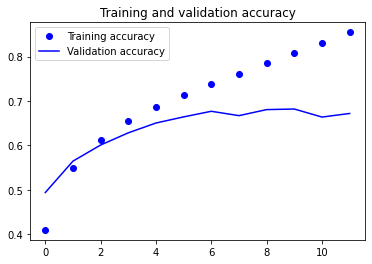

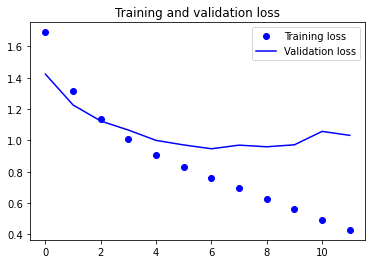

In [0]:
# VGG 1 Block 

VGG1_model = Sequential()
VGG1_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
VGG1_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
VGG1_model.add(MaxPool2D((2, 2)))
VGG1_model.add(Flatten())
VGG1_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
VGG1_model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
VGG1_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

VGG1_h = VGG1_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Score trained model.
VGG1_scores = VGG1_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', VGG1_scores[0])
print('Test accuracy:', VGG1_scores[1])

VGG1_model.summary()

summarize_diagnostics(VGG1_h)

Ta có thể thấy với 1 Block thì Val_loss rất cao

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 22s 434us/step - loss: 1.6496 - acc: 0.4063 - val_loss: 1.3737 - val_acc: 0.5051
Epoch 2/12
50000/50000 [==============================] - 20s 409us/step - loss: 1.2825 - acc: 0.5423 - val_loss: 1.2193 - val_acc: 0.5548
Epoch 3/12
50000/50000 [==============================] - 22s 431us/step - loss: 1.0913 - acc: 0.6142 - val_loss: 1.0582 - val_acc: 0.6320
Epoch 4/12
50000/50000 [==============================] - 21s 416us/step - loss: 0.9553 - acc: 0.6670 - val_loss: 0.9695 - val_acc: 0.6628
Epoch 5/12
50000/50000 [==============================] - 20s 408us/step - loss: 0.8463 - acc: 0.7039 - val_loss: 0.8819 - val_acc: 0.6929
Epoch 6/12
50000/50000 [==============================] - 21s 420us/step - loss: 0.7550 - acc: 0.7380 - val_loss: 0.8566 - val_acc: 0.7026
Epoch 7/12
50000/50000 [==============================] - 21s 414us/step - loss: 0.6767 - acc: 0.7658 - val_loss: 0.

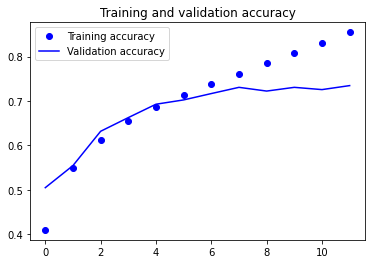

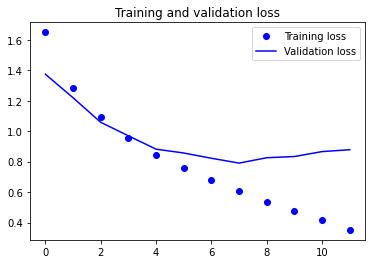

In [0]:
# VGG 2 Block 

VGG2_model = Sequential()
VGG2_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
VGG2_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
VGG2_model.add(MaxPool2D((2, 2)))
VGG2_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
VGG2_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
VGG2_model.add(MaxPool2D((2, 2)))
VGG2_model.add(Flatten())
VGG2_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
VGG2_model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
VGG2_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

VGG2_h = VGG2_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Score trained model.
VGG2_scores = VGG2_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', VGG2_scores[0])
print('Test accuracy:', VGG2_scores[1])

VGG2_model.summary()

summarize_diagnostics(VGG2_h)

In [0]:
import 

In [0]:
# Tương tự ta sẽ có VGG 3 Block
# VGG 18 thì có 4 Block... Nên ta sẽ test thêm 1 trường hợp
VGG3_model = Sequential()
VGG3_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
VGG3_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
VGG3_model.add(MaxPool2D((2, 2)))
VGG3_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
VGG3_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
VGG3_model.add(MaxPool2D((2, 2)))
VGG3_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
VGG3_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
VGG3_model.add(MaxPool2D((2, 2)))
VGG3_model.add(Flatten())
VGG3_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
VGG3_model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
VGG3_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

VGG3_h = VGG3_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Score trained model.
VGG3_scores = VGG3_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', VGG3_scores[0])
print('Test accuracy:', VGG3_scores[1])

VGG3_model.summary()

summarize_diagnostics(VGG3_h)

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 30s 596us/step - loss: 1.6383 - acc: 0.4037 - val_loss: 1.3652 - val_acc: 0.5163
Epoch 2/12
50000/50000 [==============================] - 26s 521us/step - loss: 1.2266 - acc: 0.5630 - val_loss: 1.2115 - val_acc: 0.5807
Epoch 3/12
50000/50000 [==============================] - 28s 551us/step - loss: 1.0291 - acc: 0.6384 - val_loss: 1.0126 - val_acc: 0.6460
Epoch 4/12
50000/50000 [==============================] - 27s 536us/step - loss: 0.9050 - acc: 0.6833 - val_loss: 0.9404 - val_acc: 0.6696
Epoch 5/12
50000/50000 [==============================] - 28s 557us/step - loss: 0.8000 - acc: 0.7225 - val_loss: 0.9500 - val_acc: 0.6741
Epoch 6/12
50000/50000 [==============================] - 27s 546us/step - loss: 0.7098 - acc: 0.7543 - val_loss: 0.8744 - val_acc: 0.6950
Epoch 7/12
50000/50000 [==============================] - 28s 553us/step - loss: 0.6370 - acc: 0.7783 - val_loss: 0.

NameError: ignored

10000/10000 [==============================] - 2s 173us/step
Test loss: 0.8511223284721374
Test accuracy: 0.7348
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_______

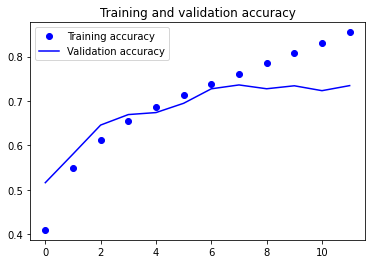

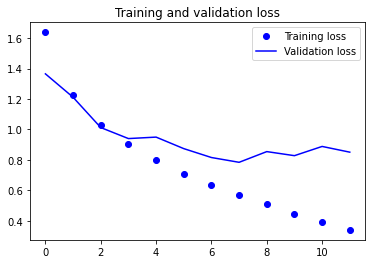

In [0]:
# Score trained model.
VGG3_scores = VGG3_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', VGG3_scores[0])
print('Test accuracy:', VGG3_scores[1])

VGG3_model.summary()

summarize_diagnostics(VGG3_h)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 59s 1ms/step - loss: 1.8555 - acc: 0.3170 - val_loss: 1.9504 - val_acc: 0.3146
Epoch 2/12
50000/50000 [==============================] - 53s 1ms/step - loss: 1.5190 - acc: 0.4329 - val_loss: 1.7186 - val_acc: 0.4020
Epoch 3/12
50000/50000 [==============================] - 51s 1ms/step - loss: 1.3734 - acc: 0.4961 - val_loss: 1.4461 - val_acc: 0.4970
Epoch 4/12
50000/50000 [==============================] - 52s 1ms/step - loss: 1.2600 - acc: 0.5399 - val_loss: 1.6342 - val_acc: 0.4511
Epoch 5/12
50000/50000 [==============================] - 51s 1ms/step - loss: 1.1695 - acc: 0.5740 - val_loss: 1.2092 - val_acc: 0.5705
Epoch 6/12
50000/50000 [==============================] - 52s 1ms/step - loss: 1.1029 - acc: 0.6011 - val_loss: 1.1323 - val_acc: 0.5919
Epoch 7/12


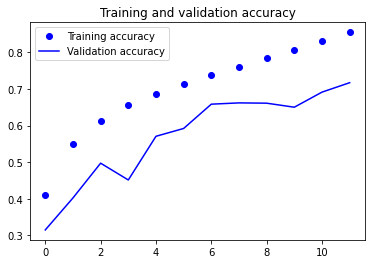

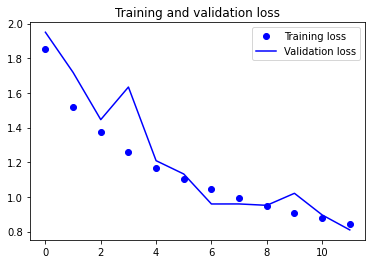

In [0]:
VGG4_model = Sequential()

VGG4_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
VGG4_model.add(BatchNormalization())
VGG4_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
VGG4_model.add(BatchNormalization())
VGG4_model.add(MaxPool2D((2, 2)))
VGG4_model.add(Dropout(0.2))

VGG4_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
VGG4_model.add(BatchNormalization())
VGG4_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
VGG4_model.add(MaxPool2D((2, 2)))
VGG4_model.add(Dropout(0.3))

VGG4_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
VGG4_model.add(BatchNormalization())
VGG4_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
VGG4_model.add(BatchNormalization())
VGG4_model.add(MaxPool2D((2, 2)))
VGG4_model.add(Dropout(0.4))

VGG4_model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
VGG4_model.add(BatchNormalization())
VGG4_model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
VGG4_model.add(BatchNormalization())
VGG4_model.add(MaxPool2D((2, 2)))
VGG4_model.add(Dropout(0.5))

VGG4_model.add(Flatten())
VGG4_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
VGG4_model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
VGG4_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

VGG4_h = VGG4_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Score trained model.
VGG4_scores = VGG4_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', VGG4_scores[0])
print('Test accuracy:', VGG4_scores[1])

VGG4_model.summary()

summarize_diagnostics(VGG4_h)